In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
folder = 'pdfs' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'
! mkdir $folder

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-05-12 16:53:19	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2016-05-12 16:53:19	Parsing datapackage to create a Study object
2016-05-12 16:53:49	Initializing Study
2016-05-12 16:53:49	Initializing Predictor configuration manager for Study
2016-05-12 16:53:49	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-05-12 16:53:49	Added ExtraTreesClassifier to default predictors
2016-05-12 16:53:49	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-05-12 16:53:49	Added ExtraTreesRegressor to default predictors
2016-05-12 16:53:49	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-05-12 16:53:49	Added GradientBoostingClassifier to default predictors
2016-05-12 16:53:49	Predictor GradientBoostingRegressor is of typ

In [2]:
splicing_singles_no_outliers = study.splicing.singles.ix[not_outliers]
print splicing_singles_no_outliers.shape

(183, 11558)


## Estimate modalities

### Initialize the modality estimator

In [3]:
import anchor

bayesian = anchor.BayesianModalities()
# binned = anchor.BinnedModalities()
# monte_carlo = anchor.MonteCarloModalities()

In [4]:
# fig = estimator.violinplot(n=1e6)
# for ax in fig.axes:
#     ax.set(yticks=[0, 0.5, 1], xlabel='')
# fig.tight_layout()
# sns.despine()
# fig.savefig('{}/modality_estimator_parameterized_family.pdf'.format(folder))

## Calculate/Estimate modalities only on single cells, with no outliers

And at least 20 cells per splicing event, per celltype/phenotype

In [5]:
print splicing_singles_no_outliers.shape
splicing_singles_no_outliers = splicing_singles_no_outliers.groupby(
    study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh=10, axis=1))
print splicing_singles_no_outliers.shape

(183, 11558)
(183, 11233)


In [6]:
pkm_events = study.splicing.maybe_renamed_to_feature_id('PKM')

In [7]:
%time modality_assignments = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype).apply(bayesian.fit_predict)

CPU times: user 10min 31s, sys: 118 ms, total: 10min 31s
Wall time: 10min 31s


In [8]:
modality_assignments

,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,exon:chr10:101507014-101507147:+@exon:chr10:101514286-101514391:+@exon:chr10:101515382-101515465:+,exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-,exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-,exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-,exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+,...,exon:chrY:15028429-15028546:+@exon:chrY:15028819-15028972:+@exon:chrY:15029315-15029454:+,exon:chrY:15560897-15560946:-@exon:chrY:15526615-15526673:-@exon:chrY:15522873-15522993:-,exon:chrY:15591134-15591384:-@exon:chrY:15582001-15582109:-@exon:chrY:15560897-15560946:-,exon:chrY:21903621-21903743:-@exon:chrY:21903204-21903374:-@exon:chrY:21901414-21901548:-,exon:chrY:22744476-22744579:+@exon:chrY:22746360-22746410:+@exon:chrY:22749910-22749991:+,exon:chrY:2709527-2709668:+@exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+,exon:chrY:2710206-2710283:+@exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+,exon:chrY:2712118-2712298:+@exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+,exon:chrY:2713687-2713784:+@exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+,exon:chrY:2722641-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734903:+
phenotype,,,,,,,,,,,,,,,,,,,,,
MN,included,bimodal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,included,...,NaN,NaN,NaN,NaN,NaN,included,included,included,included,included
NPC,included,bimodal,bimodal,NaN,bimodal,NaN,NaN,included,bimodal,included,...,NaN,included,included,NaN,included,included,included,included,included,included
iPSC,included,included,bimodal,bimodal,included,included,bimodal,bimodal,bimodal,included,...,included,included,bimodal,bimodal,included,included,included,included,included,included


In [9]:
modalities_tidy = modality_assignments.stack().reset_index()
modalities_tidy = modalities_tidy.rename(columns={'level_1': 'event_id', 0: "modality",})
modalities_tidy.head()

,phenotype,event_id,modality
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,bimodal
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included
3,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:10...,bimodal


In [10]:
modalities_tidy.loc[modalities_tidy.event_id.isin(pkm_events)]

,phenotype,event_id,modality
1333,MN,exon:chr15:72499069-72499221:-@exon:chr15:7249...,included
1334,MN,exon:chr15:72499069-72499221:-@exon:chr15:7249...,included
1335,MN,exon:chr15:72499069-72499221:-@exon:chr15:7249...,bimodal
1336,MN,exon:chr15:72523457-72523547:-@exon:chr15:7251...,excluded
7255,NPC,exon:chr15:72499069-72499221:-@exon:chr15:7249...,included
7256,NPC,exon:chr15:72499069-72499221:-@exon:chr15:7249...,included
7257,NPC,exon:chr15:72499069-72499221:-@exon:chr15:7249...,excluded
7258,NPC,exon:chr15:72523457-72523547:-@exon:chr15:7251...,excluded
16034,iPSC,exon:chr15:72499069-72499221:-@exon:chr15:7249...,included
16035,iPSC,exon:chr15:72499069-72499221:-@exon:chr15:7249...,excluded


In [11]:
modalities_counts = modalities_tidy.groupby(['phenotype', 'modality']).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,# AS events
0,MN,bimodal,1233
1,MN,excluded,1064
2,MN,included,2880
3,MN,uncategorized,2
4,NPC,bimodal,2194


In [12]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

In [13]:
modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,1961,1557,1064
bimodal,2755,2194,1233
included,5723,4430,2880
middle,1,NaN,NaN
uncategorized,31,3,2


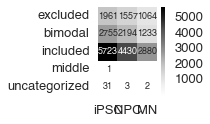

In [14]:
fig, ax= plt.subplots(figsize=(3, 2))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=9), cmap='Greys')
ax.set(xlabel='', ylabel='')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(folder))

In [15]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,# AS events,percentage
0,MN,bimodal,1233,23.807685
1,MN,excluded,1064,20.544507
2,MN,included,2880,55.609191
3,MN,uncategorized,2,0.038617
4,NPC,bimodal,2194,26.808407
5,NPC,excluded,1557,19.024927
6,NPC,included,4430,54.130010
7,NPC,uncategorized,3,0.036657
8,iPSC,bimodal,2755,26.310763
9,iPSC,excluded,1961,18.727915


/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2848: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


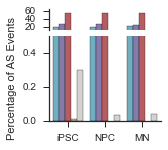

In [16]:
sns.set(style='ticks')
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(2, 2), gridspec_kw=dict(hspace=0.1, height_ratios=[0.2, 0.8]))

ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax, bottom=True)
ax.tick_params(axis='x', bottom='off')
ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='') #yticks=[10, 50, ])

ax = axes[1]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
           hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.set(ylim=(0, 0.5), ylabel='Percentage of AS Events', 
       xlabel='')
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax)
# fig.tight_layout()
fig.savefig('{}/modalities_barplot.pdf'.format(folder))

In [17]:
study.supplemental.modalities_tidy = modalities_tidy

In [18]:
modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1233
           excluded         1064
           included         2880
           uncategorized       2
NPC        bimodal          2194
           excluded         1557
           included         4430
           uncategorized       3
iPSC       bimodal          2755
           excluded         1961
           included         5723
           middle              1
           uncategorized      31
dtype: int64

In [19]:
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study.save('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json


In [20]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False